# Question 2: Applied ML

In [1]:
import numpy as np
import itertools

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score

## 2.1 Feature Preparation

In [2]:
newsgroups = fetch_20newsgroups(subset='all', 
                                shuffle=True,
                                remove=('headers', 'footers', 'quotes'))

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(newsgroups.data)
y = newsgroups.target

In the assignment, it is asked to split the data into 80% training data, 10% validation data and 10% testing data.
We decided to not throw away 10% of the data for validation purposes and instead use crossvalidation with 90% of the total data and leave 10% for the test data.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

## 2.2 Training a Random Forest

In [4]:
rf = RandomForestClassifier()
#rf = rf.fit(X_train, y_train)
y_pred = cross_val_predict(rf, X_test, y_test, cv=5)
f1_score(y_test, y_pred, average='weighted')

### Finding best hyper parameters using grid search

In [10]:
rf_grid = RandomForestClassifier()

param_grid = {
    "n_estimators": [10, 20, 30, 40, 50],
    "max_depth": [5, 10, 15, 20, 25]
}

CV_rf = GridSearchCV(estimator=rf_grid, param_grid=param_grid, cv=5, verbose=1)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  7.9min finished


{'max_depth': 25, 'n_estimators': 50}


### Plotting the grid search results

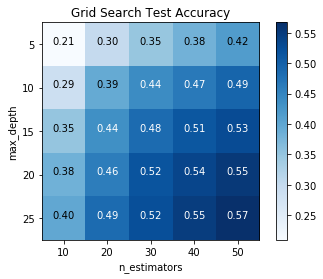

In [12]:
test_scores = CV_rf.cv_results_['mean_test_score']
test_scores = test_scores.reshape((len(param_grid['max_depth']), len(param_grid['n_estimators'])))
max_depth_idx = CV_rf.cv_results_['param_max_depth']
n_estimators_idx = CV_rf.cv_results_['param_n_estimators']

plt.imshow(test_scores, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Grid Search Test Accuracy')
plt.colorbar()
plt.xticks(np.arange(len(param_grid['n_estimators'])), param_grid['n_estimators'])
plt.yticks(np.arange(len(param_grid['max_depth'])), param_grid['max_depth'])

fmt = '.2f'
thresh = test_scores.max() * 3 / 4.

for i, j in itertools.product(range(test_scores.shape[0]), range(test_scores.shape[1])):
    plt.text(j, i, format(test_scores[i,j], fmt),
            horizontalalignment="center",
            color="white" if test_scores[i,j] > thresh else "black")

plt.ylabel('max_depth')
plt.xlabel('n_estimators')

In [13]:
best_rf = CV_rf.best_estimator_

In [14]:
y_pred = cross_val_predict(best_rf, X_test, y_test, cv=5)
f1_score(y_test, y_pred, average='weighted')

0.40668758338688438

### Plotting the confusion matrix

In [15]:
cm = confusion_matrix(y_test, y_pred)

In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    
    Adapted from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


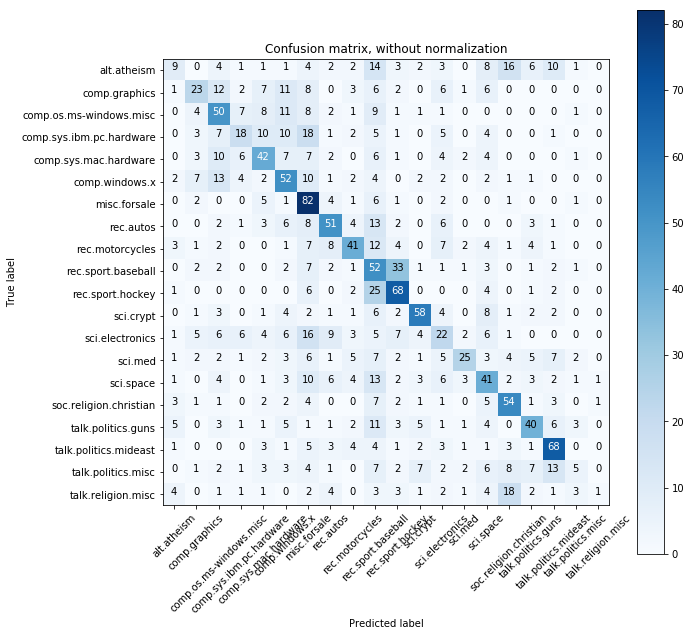

In [17]:
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, classes=newsgroups.target_names,
                      title='Confusion matrix, without normalization')

### Most important features

In [18]:
best_features_vec = best_rf.feature_importances_
best_features_vec

array([ 0.00122451,  0.00026648,  0.        , ...,  0.        ,
        0.        ,  0.        ])

In [19]:
feature_names = np.array(vectorizer.get_feature_names())
tfidf_sorting = np.argsort(best_features_vec).flatten()[::-1]

n = 100
top_n = feature_names[tfidf_sorting][:n]

In [20]:
top_n

array(['game', 'bike', 'sale', 'god', 'car', 'israel', 'windows', 'dod',
       'cars', 'government', 'dos', 'drive', 'of', 'space', 'playoffs',
       'clipper', 'key', 'ride', 'gun', 'israeli', 'games', 'mac',
       'graphics', 'shipping', 'arabs', 'christians', 'jesus', 'church',
       'leafs', 'security', 'quadra', 'jews', 'christ', 'condition',
       'baseball', 'widget', 'christian', 'catholic', 'shuttle', 'chip',
       'that', 'card', 'bruins', 'ide', 'by', 'armenians', 'apple', 'sox',
       'pc', 'goals', 'arab', 'pitching', 'team', 'hitter', 'for',
       'league', 'solar', 'encryption', 'season', 'turks', 'argic',
       'heaven', 'fire', 'files', 'in', 'riding', 'encrypted', 'pitcher',
       'scripture', 'engine', 'motif', 'players', 'jewish', 'not',
       'launch', 'x11', 'bus', 'nasa', 'thanks', 'soviet', 'phones', 'use',
       'serdar', 'to', 'armenia', 'nsa', 'crypto', 'earth', 'sin',
       'islanders', 'his', 'monitor', 'window', 'x11r4', '3d', 'scsi',
       '